Implementar la función create_gauss_filter(h, w, k_size, sigma) para crear filtros gaussianos para 
filtrado espectral. Debe retornar un filtro gaussiano de tamaño HxW en dominio espacial y su transformada 
de Fourier.

1. Graficar ambas representaciones para diferentes tamaños de kernel y sigma. Aplicar el filtro una 
imagen para validar el funcionamiento en el dominio espectral. 
2. Usando el método descripto en el paper “Image Sharpness Measure for Blurred Images in Frequency 
Domain” comparar el resultado de un filtrado por convolución con el filtrado espectral.
3. Repetir la comparación usando uno de los métodos descriptos en el apéndice del paper “Analysis of 
focus measure operators in shape-from-focus”

In [42]:
%matplotlib inline

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## Inciso 1

### Función create_gauss_filter

In [2]:
def create_gauss_filter(h, w, k_size=5, sigma=5):
    
    '''
    Devuelve kernel en dominio espacial y kernel en dominio espectral
    
    -------------------------------------------------------
    Parámetros:
    param h: alto de la imagen
    param w: ancho de la imagen
    param k_size: Tamaño del núcleo, positivo impar (3,5,...)
    param sigma:  Desvío estándar de la Gaussiana. Si no es positivo, se calcula como sigma = 0.3*((ksize-1)*0.5 - 1) + 0.8 
    '''

    # Creo el kernel 1d y a partir de el genero el kernel 2d
    kernel_1d = cv.getGaussianKernel(ksize=k_size, sigma=sigma) 
    kernel_2d = kernel_1d * kernel_1d.T

    # Hago el pad para completar el tamaño de la imagen con ceros
    h1 = np.floor((h - k_size)/2).astype(int)
    h2 = np.ceil((h - k_size)/2).astype(int)
    w1 = np.floor((w - k_size)/2).astype(int)
    w2 = np.ceil((w - k_size)/2).astype(int)
    kernel = np.pad(kernel_2d, ((h1,h2),(w1,w2)), 'constant')

    # Aplico la transformada
    kernel_ftt = np.fft.fft2(kernel)
    
    # llevo la baja frec al origen para acomodar la visualizacion
    # kernel_ftt = np.fft.fftshift(kernel_ftt)
    
    return kernel, kernel_ftt


-1

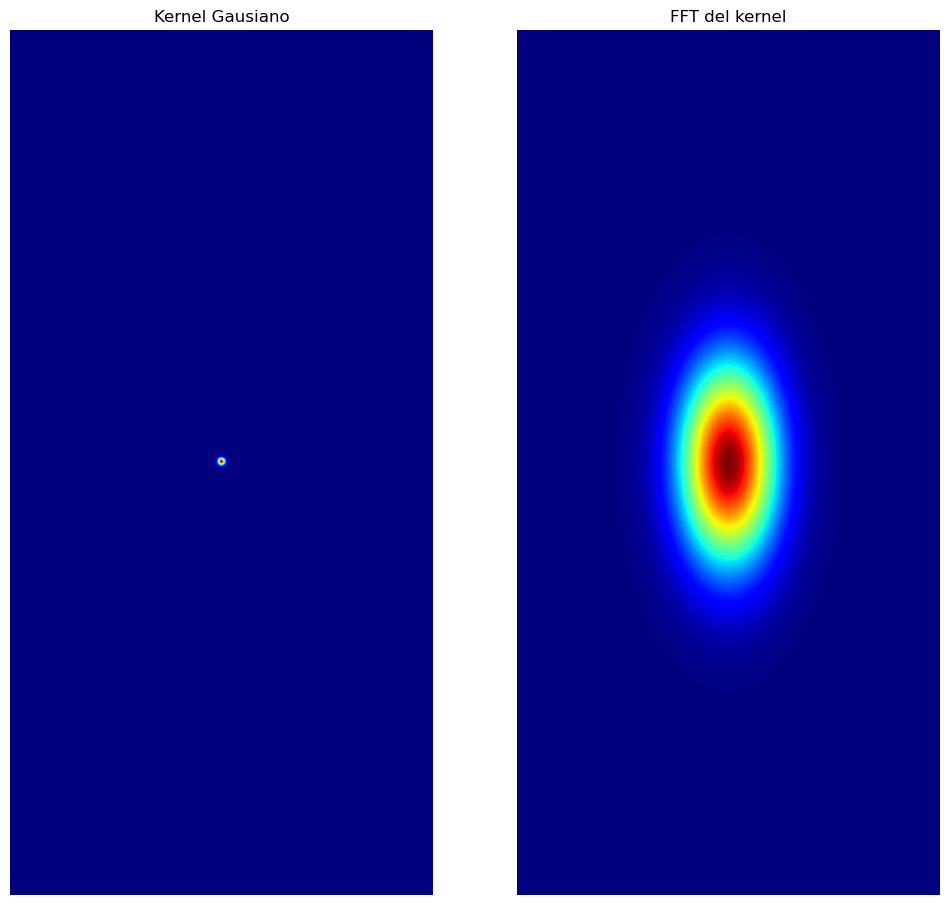

In [3]:
h = 698
w = 341

kernel, kernel_tf = create_gauss_filter(h, w, k_size=15, sigma=2)

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.axis('off')
plt.title("Kernel Gausiano")
plt.imshow(kernel, cmap='jet')
plt.subplot(1,2,2)
plt.axis('off')
plt.title("FFT del kernel")
tf_shifted = np.fft.fftshift(kernel_tf)
plt.imshow(np.abs(tf_shifted), cmap='jet')

cv.waitKey(0)

### Grafico Kernels para distintos tamaños y sigmas

In [4]:
sizes = [3,7,11,15,19]
sigmas = np.arange(0.5,3,0.5)
print ('Tamaños:', sizes)
print('Sigmas:', sigmas)

Tamaños: [3, 7, 11, 15, 19]
Sigmas: [0.5 1.  1.5 2.  2.5]


In [5]:
kernels = []
kernels_tf = []

for i, size in enumerate(sizes):
    for j, sigma in enumerate(sigmas):
        kernel, kernel_tf = create_gauss_filter(h, w, k_size=size, sigma=sigma)
        kernels.append(kernel)
        kernels_tf.append(kernel_tf)
kernels = np.array(kernels).reshape(5,-1,h,w)
kernels_tf = np.array(kernels_tf).reshape(5,-1,h,w)

D:\Users\juanp_schamun\AppData\Local\Temp\ipykernel_26328\82846136.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8,8))


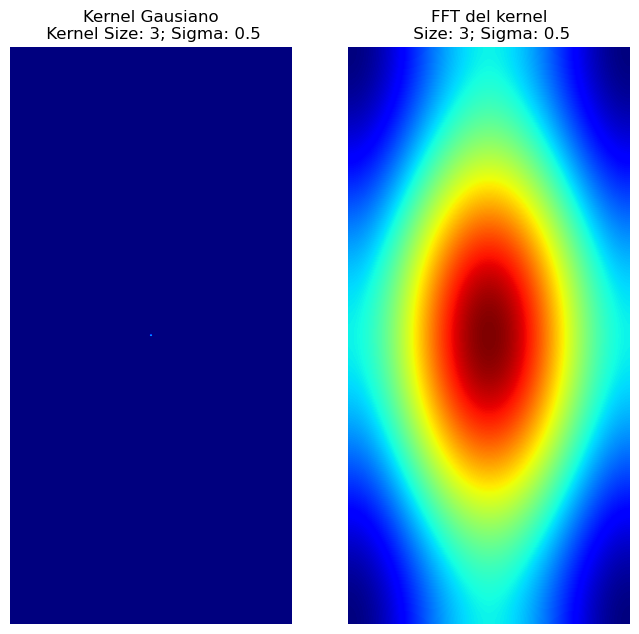

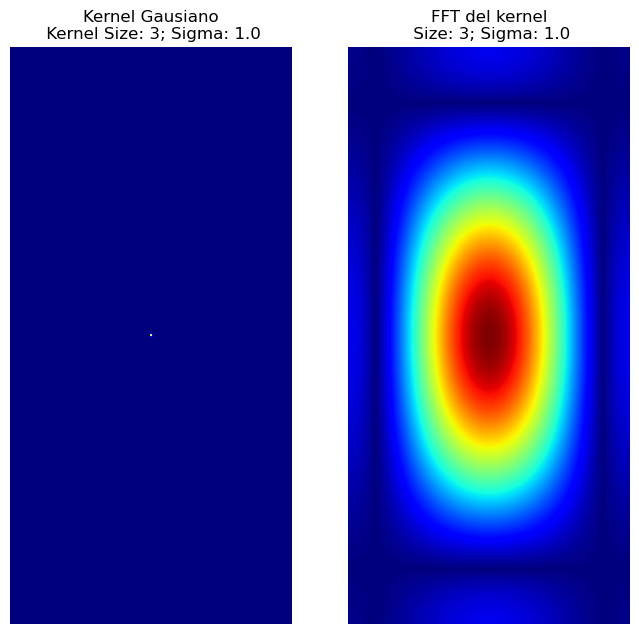

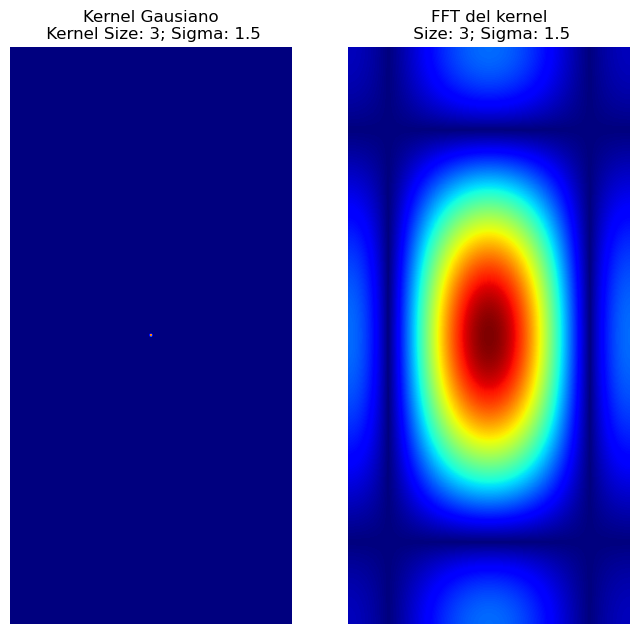

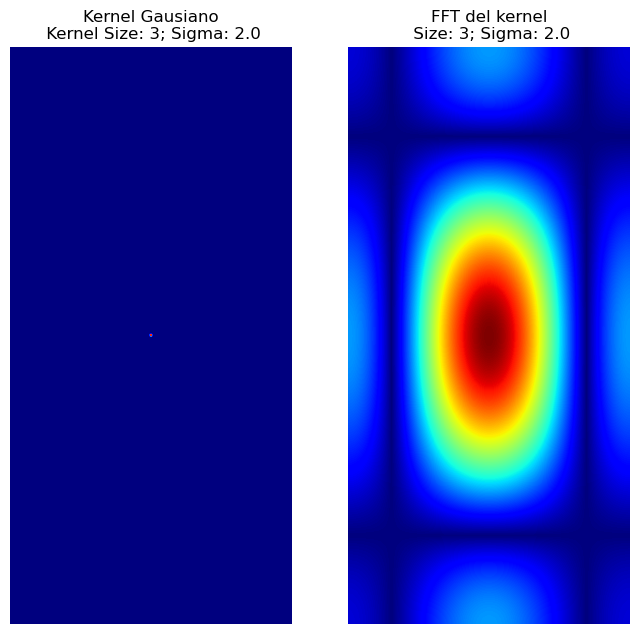

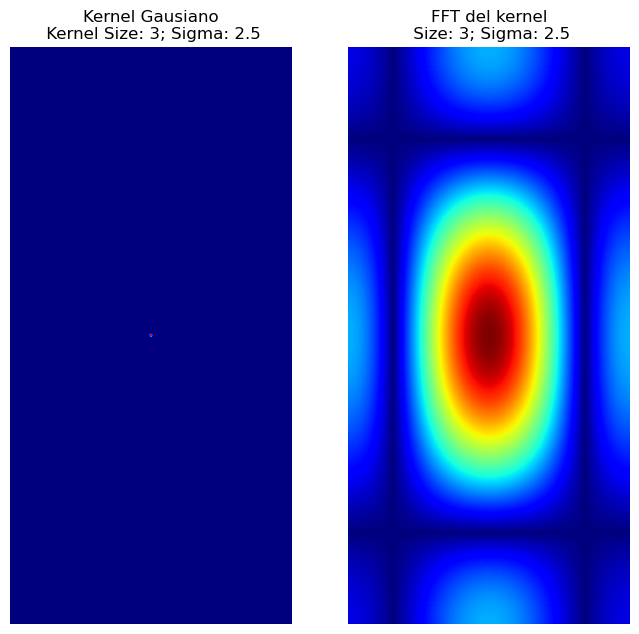

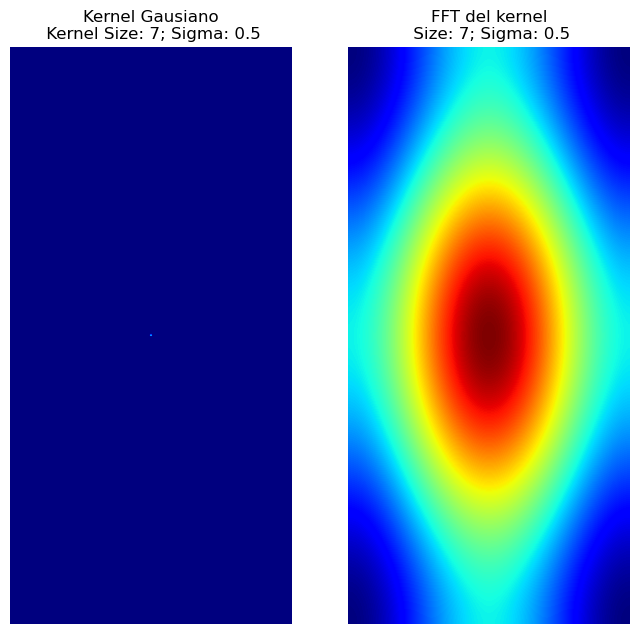

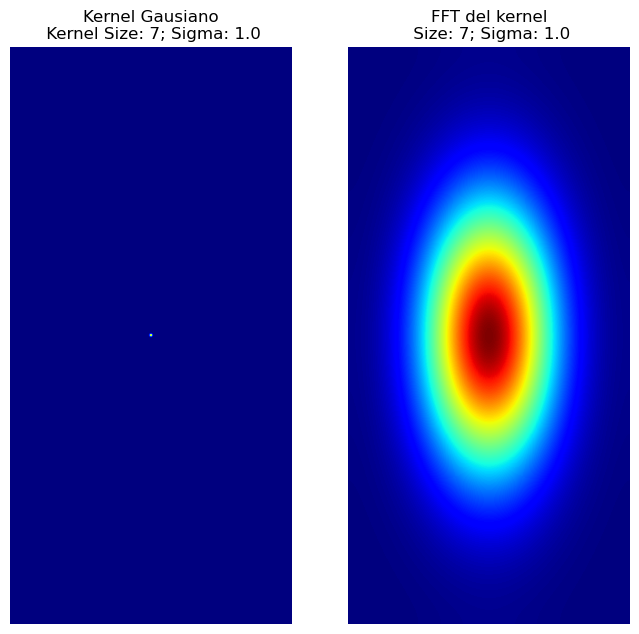

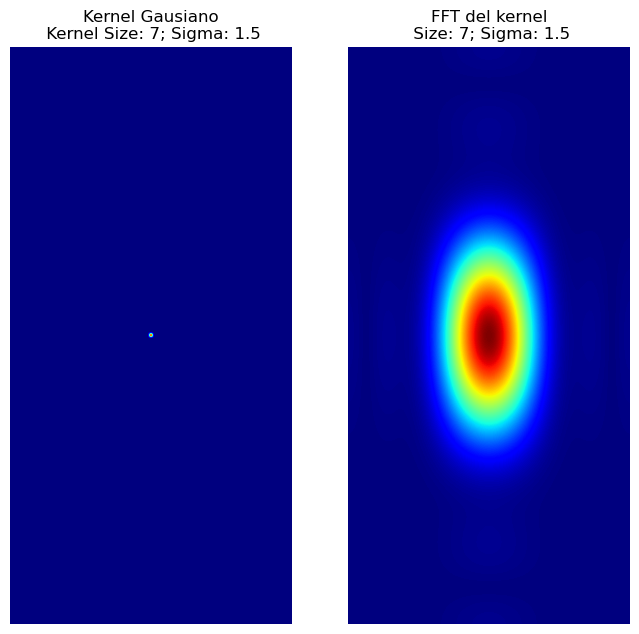

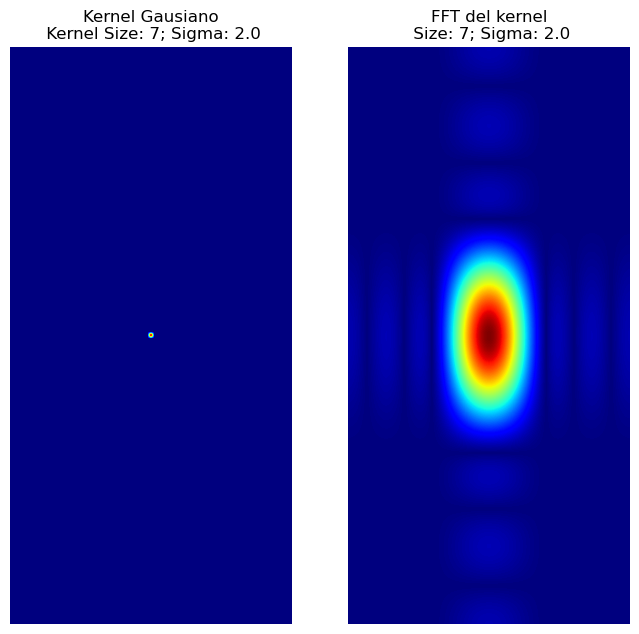

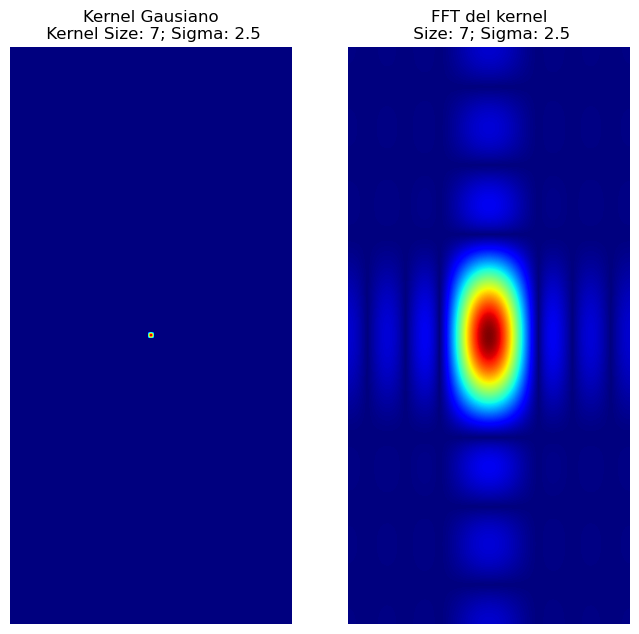

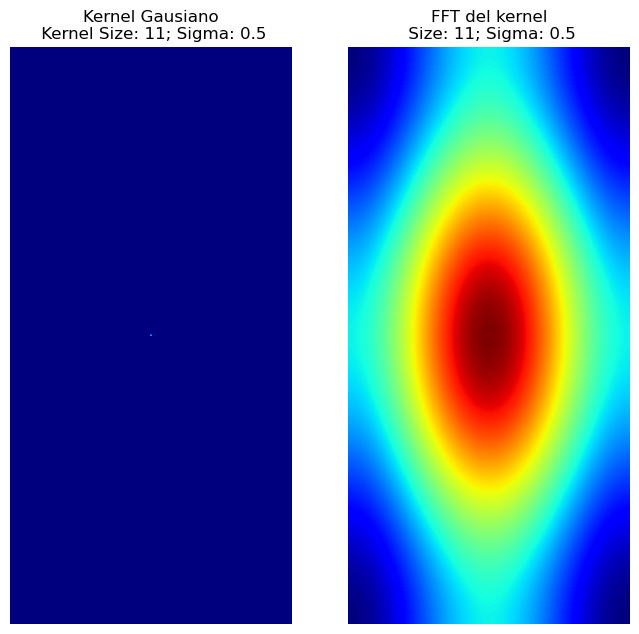

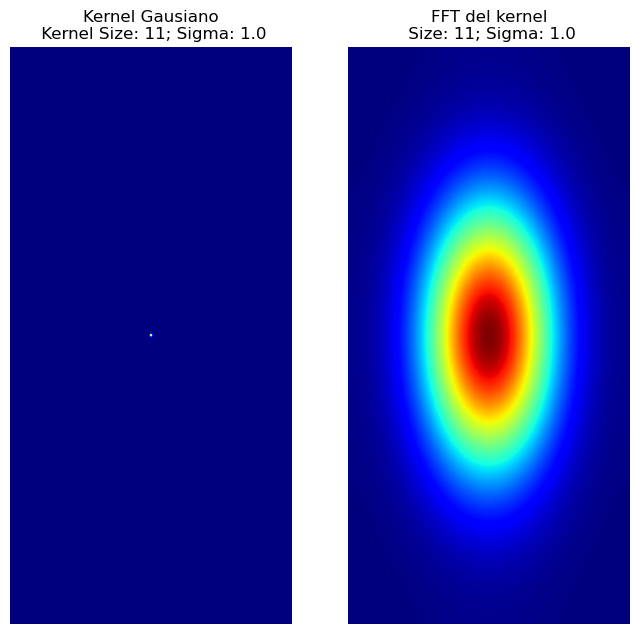

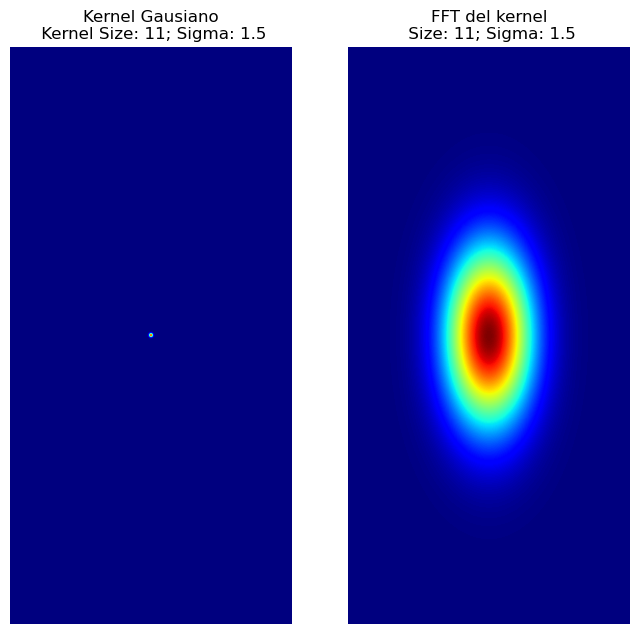

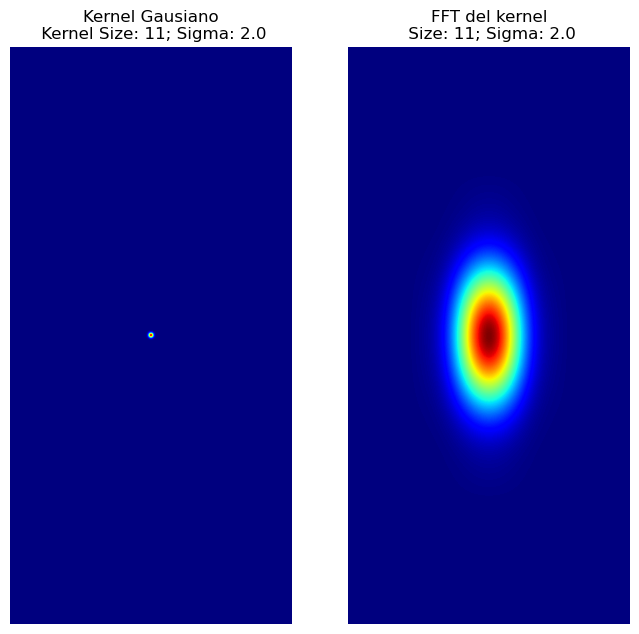

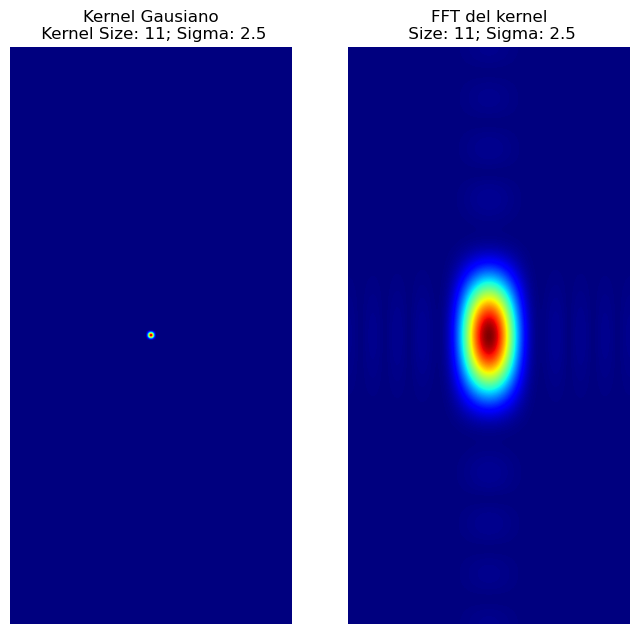

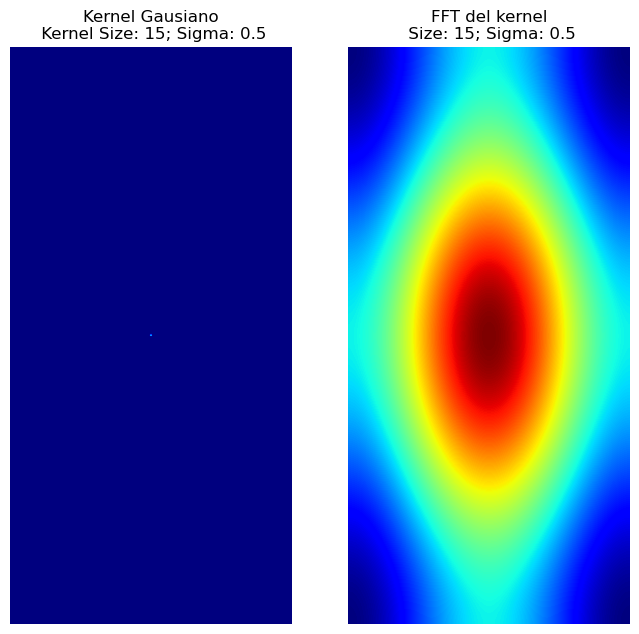

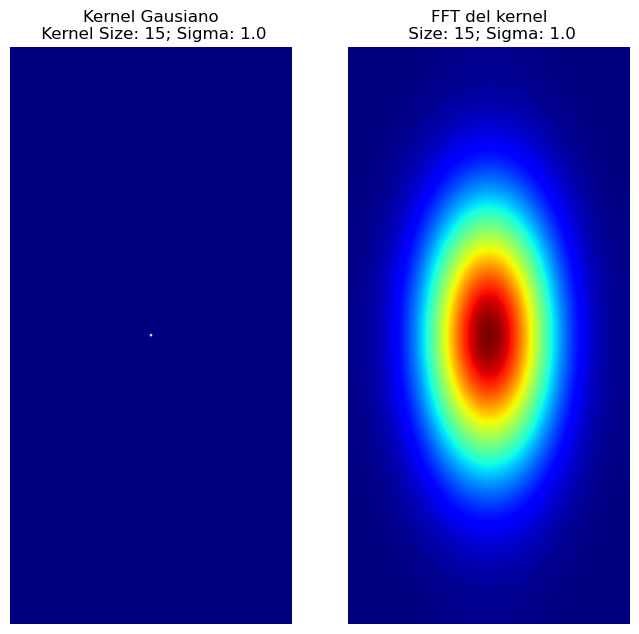

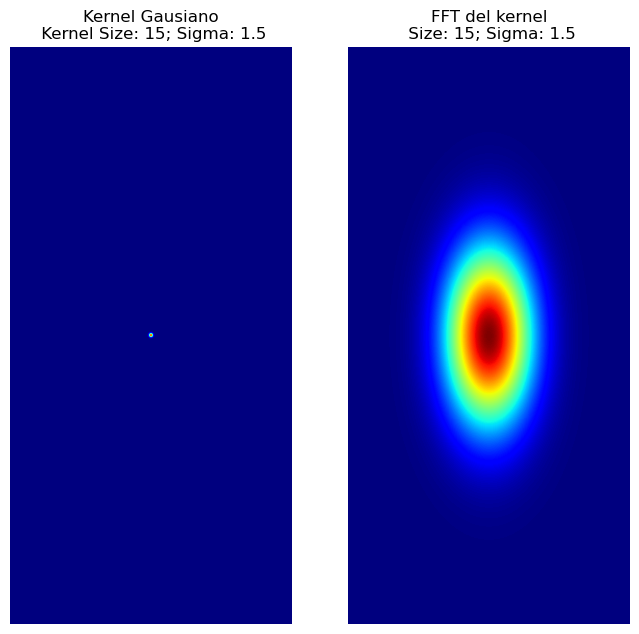

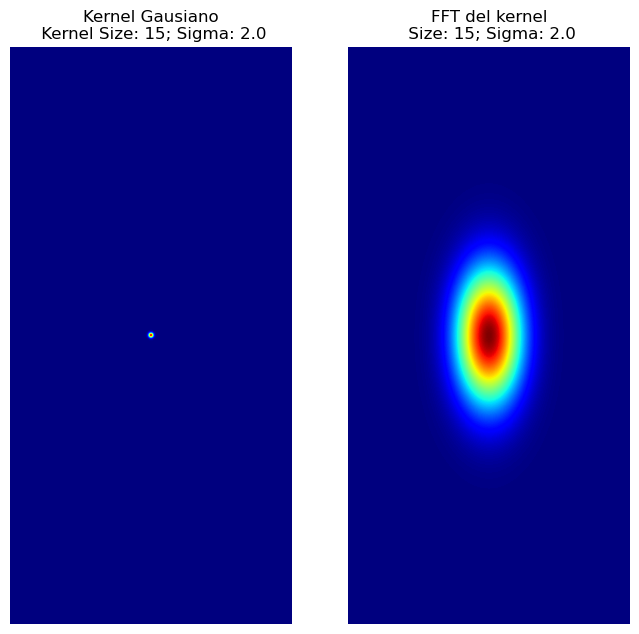

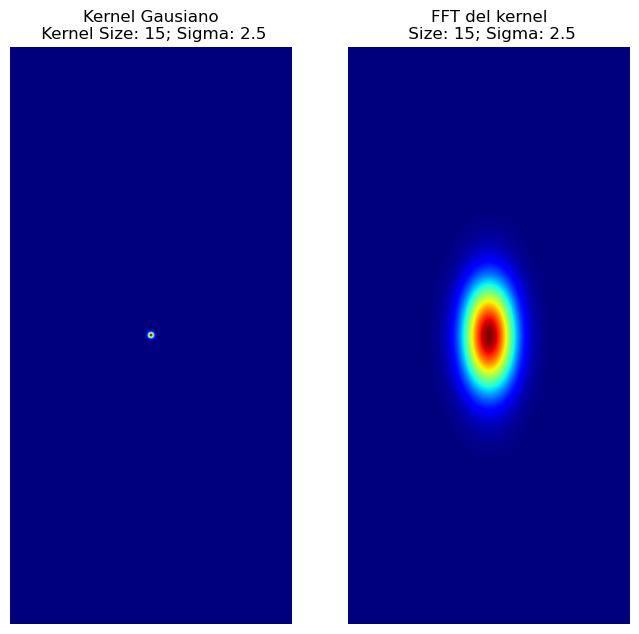

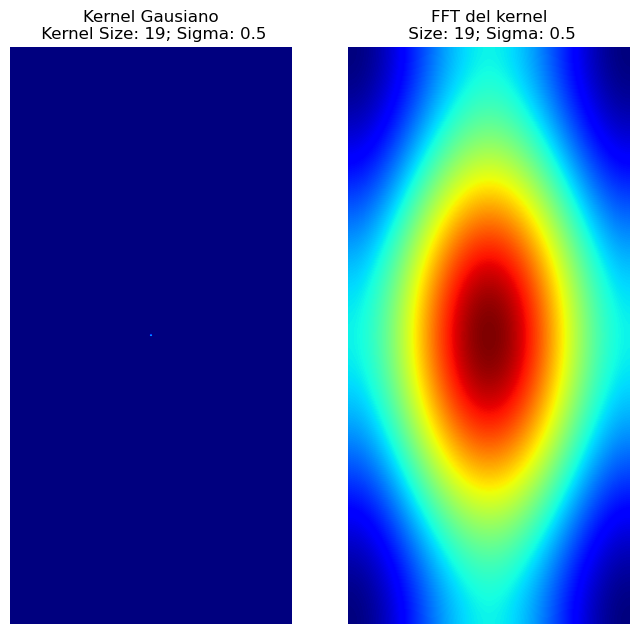

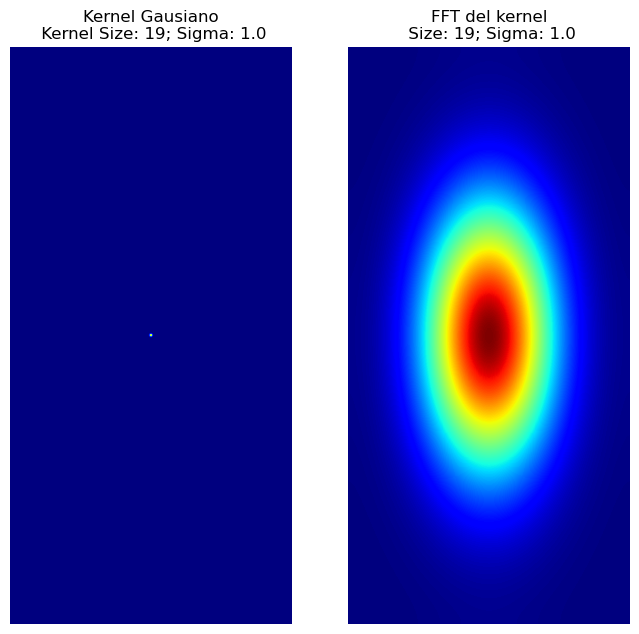

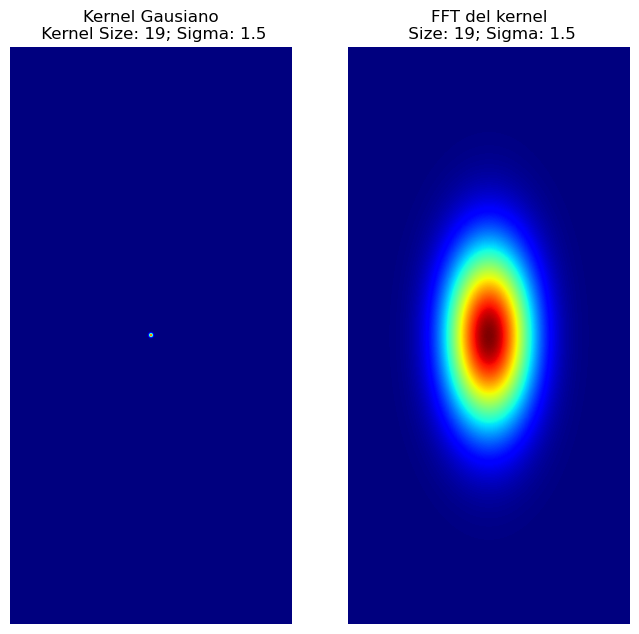

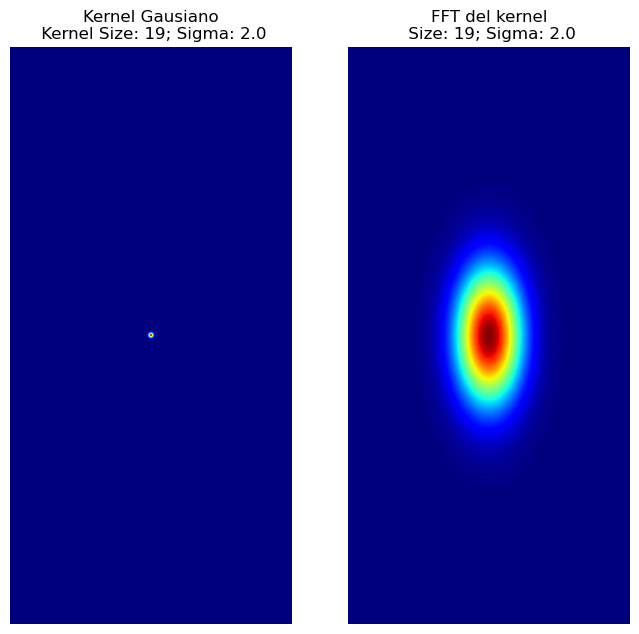

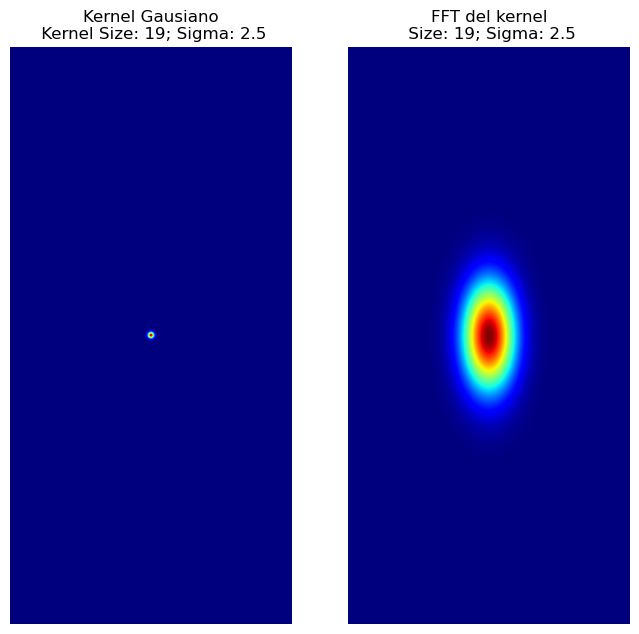

In [6]:
for i, size in enumerate(sizes):
    for j, sigma in enumerate(sigmas):      
        plt.figure(figsize=(8,8))
        plt.subplot(1,2,1)
        plt.axis('off')
        plt.title("Kernel Gausiano\n Kernel Size: {}; Sigma: {}".format(size, sigma))
        plt.imshow(kernels[i,j], cmap='jet')
        plt.subplot(1,2,2)
        plt.axis('off')
        plt.title("FFT del kernel\n Size: {}; Sigma: {}".format(size, sigma))
        tf_shifted = np.fft.fftshift(kernels_tf[i,j])
        plt.imshow(np.abs(tf_shifted), cmap='jet')

        cv.waitKey(0)

### Aplicar a una imagen

Funcion gaussian_spectral_blur

Para aplicar sobre la imagen de manera análoga al gaussiano de opencv pero en dominio espectral

In [7]:
def gaussian_spectral_blur(img, k_size=15, sigma=2):

    '''
    Filtra una imagen con con un filtro gaussiano en el dominio espectral
    '''

    h, w = img.shape
    img_fft = np.fft.fft2(img)

    kernel, kernel_tf = create_gauss_filter(h, w, k_size=k_size, sigma=sigma)
    filtered = img_fft * kernel_tf

    blured_image = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))   
    
    return blured_image

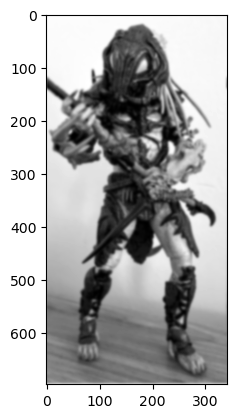

In [8]:
img = cv.imread('fft_alfa_pred.png', cv.IMREAD_GRAYSCALE)
img_gauss = gaussian_spectral_blur(img, k_size=15, sigma=2)
plt.imshow(img_gauss, cmap='gray')

Text(0.5, 1.0, 'Desenfoque gausiano')

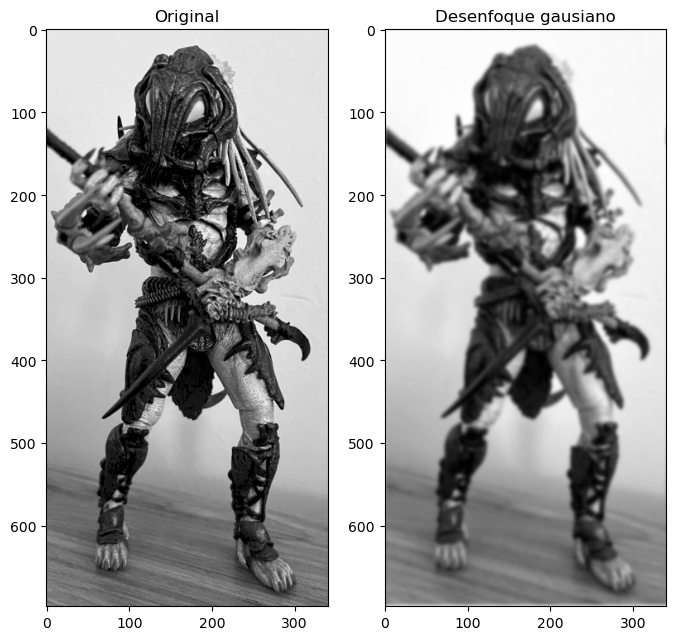

In [9]:
# Figura 'fft_alfa_pred.png'
img = cv.imread('fft_alfa_pred.png', cv.IMREAD_GRAYSCALE)
gaussian_spectral_blur(img, k_size=15, sigma=2)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
# plt.axis('off')
plt.imshow(img, cmap='gray')
plt.title('Original')

plt.subplot(1,2,2)
# plt.axis('off')
plt.imshow(img_gauss, cmap='gray')
plt.title('Desenfoque gausiano')

Text(0.5, 1.0, 'Desenfoque gausiano')

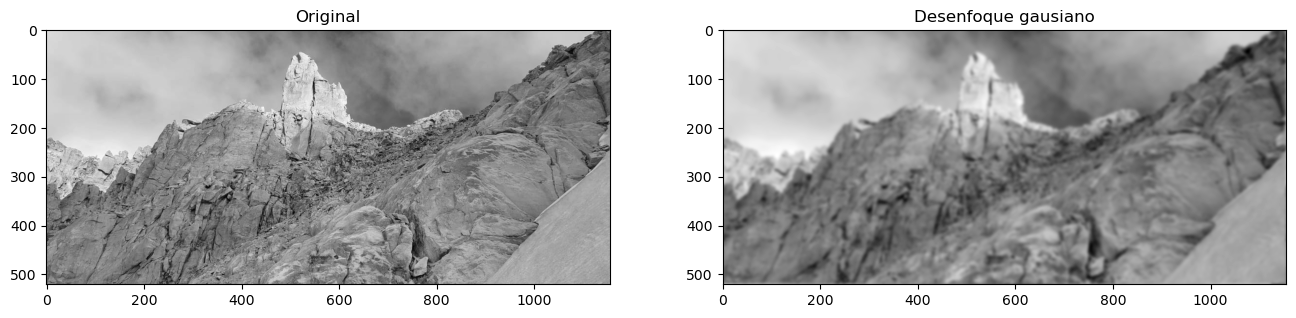

In [10]:
# Figura 'mountain.jpeg'
img = cv.imread('mountain.jpeg', cv.IMREAD_GRAYSCALE)
img_gauss = gaussian_spectral_blur(img, k_size=25, sigma=3)

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
# plt.axis('off')
plt.imshow(img, cmap='gray')
plt.title('Original')

plt.subplot(1,2,2)
# plt.axis('off')
plt.imshow(img_gauss, cmap='gray')
plt.title('Desenfoque gausiano')

## Inciso 2

### Definicion Funcion Quality_Measuire

3.1 Algorithm for image quality measure 
 
Input: Image I of size h×w.
 
Output: Image Quality measure (FM) where FM stands for Frequency Domain Image Blur Measure 
 
Step 1: Compute F which is the Fourier Transform representation of image I   
 
Step 2:  Find Fc which is obtained by shifting the origin of F to centre. 
 
     Step 3: Calculate AF = abs (Fc) where AF is the absolute value of the centered Fourier transform of image I. 
 
     Step 4:  Calculate M = max (AF) where M is the maximum value of the frequency component in F. 
 
Step 5: Calculate TH = the total number of pixels in F whose pixel value > thres, where thres = M/1000. 
 
Step 6: Calculate Image Quality measure (FM) from equation (1)
 
     Image quality measure (FM) = TH /(M*N) 


 



In [11]:
def quality_measure(img):

    '''
    Devuelve la métrica de calidad de la imagen
    input: imagen de alto h y ancho w
    '''
    h = img.shape[0]
    w = img.shape[1]

    F = np.fft.fft2(img)
    Fc = np.fft.fftshift(F)
    Af = np.abs(Fc)
    M = np.max(Af)
    thres = M/1000
    TH = F[F>thres].shape[0]
    FM = TH/(h*w)

    return FM

### Prueba de la función con blureado espectral y por convolución.

Lo hago para 3 imagenes
- mountain.jpeg
- fft_alfa_pred.png
- chewbacca.jpg

##### Imagen mountain.jpeg

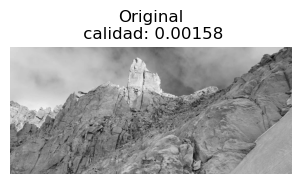

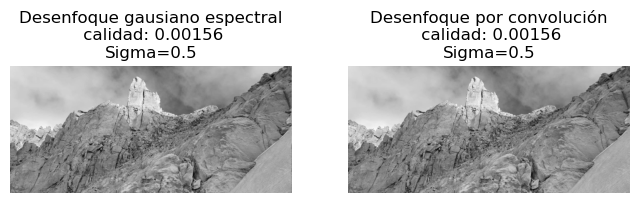

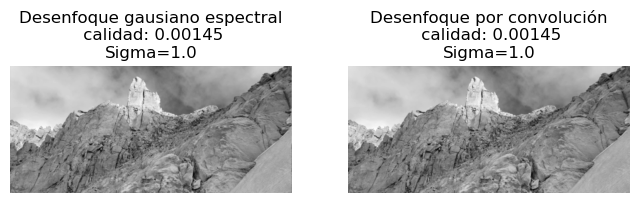

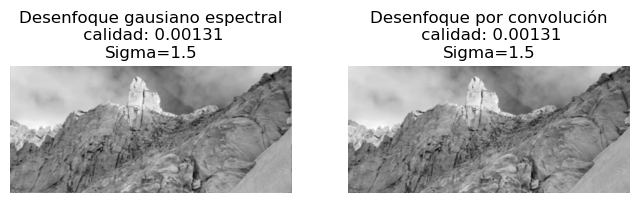

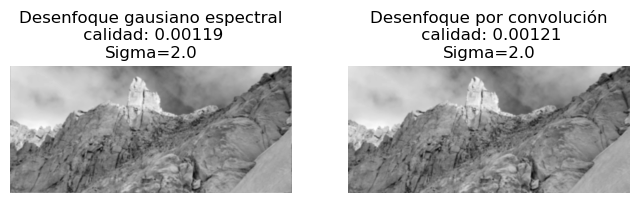

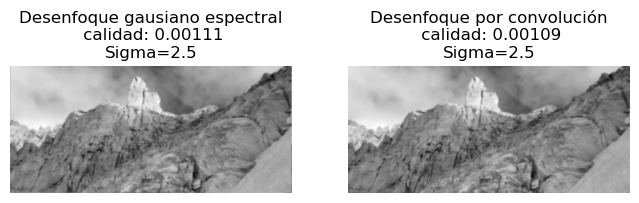

In [31]:

# Figura 'mountain.jpeg'
img_name = 'mountain.jpeg'

sigmas = sigmas
img = cv.imread(img_name, cv.IMREAD_GRAYSCALE)
size = 15

q_espectral_result   = []
q_convolucion_result = []

q_original = quality_measure(img)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.title('Original\n calidad: {:.5f}'.format(q_original, sigma))

for sigma in sigmas:

    img_spec_blur = gaussian_spectral_blur(img, k_size=size, sigma=sigma)
    img_conv_blur = cv.GaussianBlur(img, ksize=(size, size), sigmaX=sigma,  sigmaY=sigma)


    q_espectral =   quality_measure(img_spec_blur)
    q_convolucion = quality_measure(img_conv_blur)

    q_espectral_result.append(q_espectral)
    q_convolucion_result.append(q_convolucion)

    plt.figure(figsize=(8,8))
    plt.subplot(1,2,1)
    plt.axis('off')
    plt.imshow(img_spec_blur, cmap='gray')
    plt.title('Desenfoque gausiano espectral\n calidad: {:.5f}\nSigma={}'.format(q_espectral, sigma))

    plt.subplot(1,2,2)
    plt.axis('off')
    plt.imshow(img_conv_blur, cmap='gray')
    plt.title('Desenfoque por convolución\n calidad: {:.5f}\nSigma={}'.format(q_convolucion, sigma))

    cv.waitKey(0)


Text(0.5, 1.0, 'Calidad de la imagen vs sigma para imagen: mountain.jpeg')

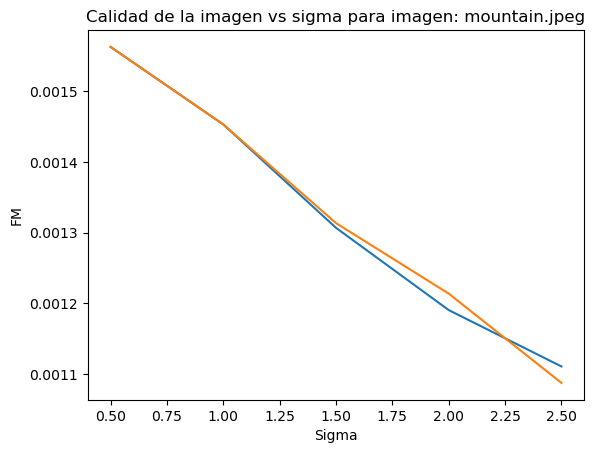

In [32]:
q_espectral_result = np.array(q_espectral_result)
q_convolucion_result = np.array(q_convolucion_result)
plt.plot(sigmas, q_espectral_result)
plt.plot(sigmas, q_convolucion_result)
plt.xlabel('Sigma')
plt.ylabel('FM')
plt.title('Calidad de la imagen vs sigma para imagen: {}'.format(img_name))

##### Imagen fft_alfa_pred.png

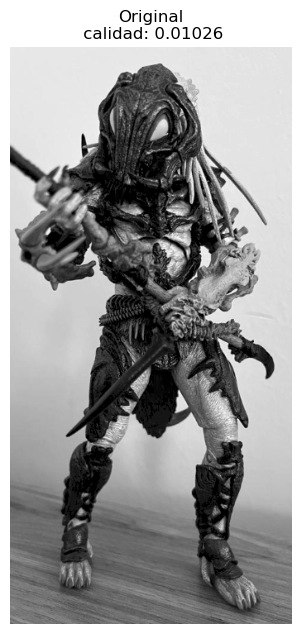

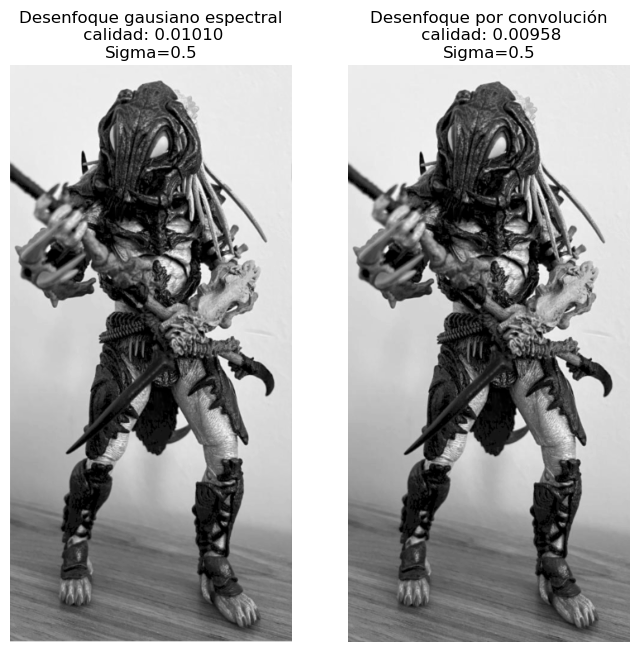

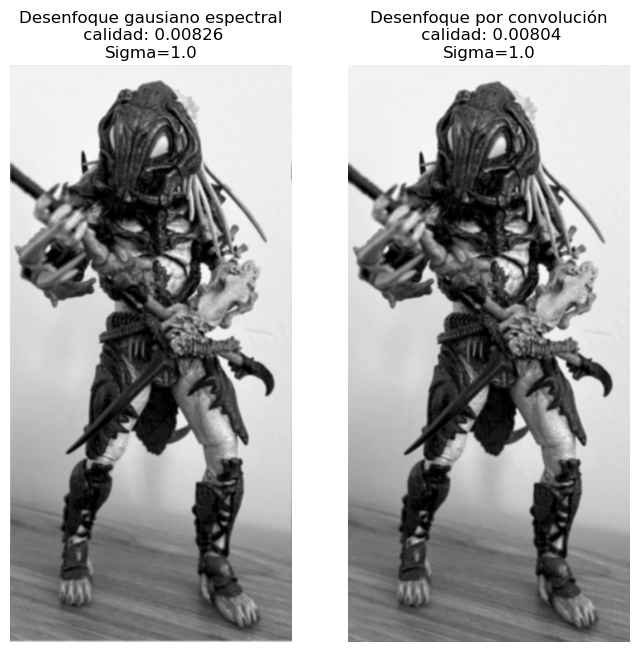

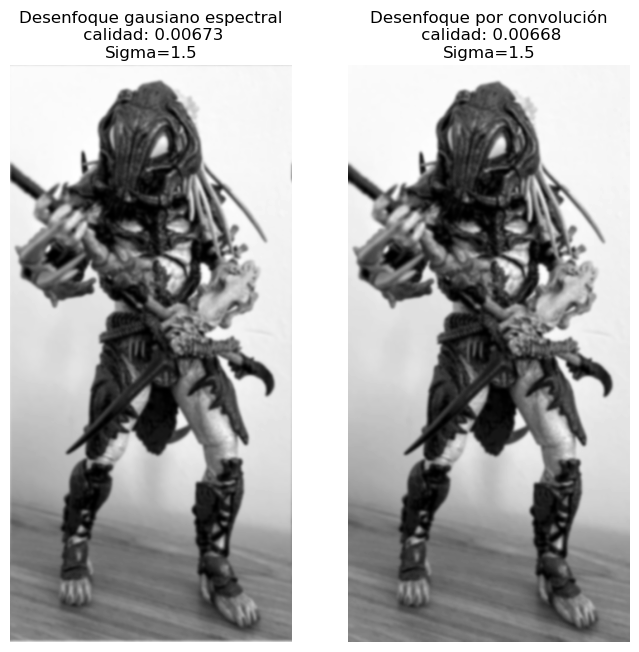

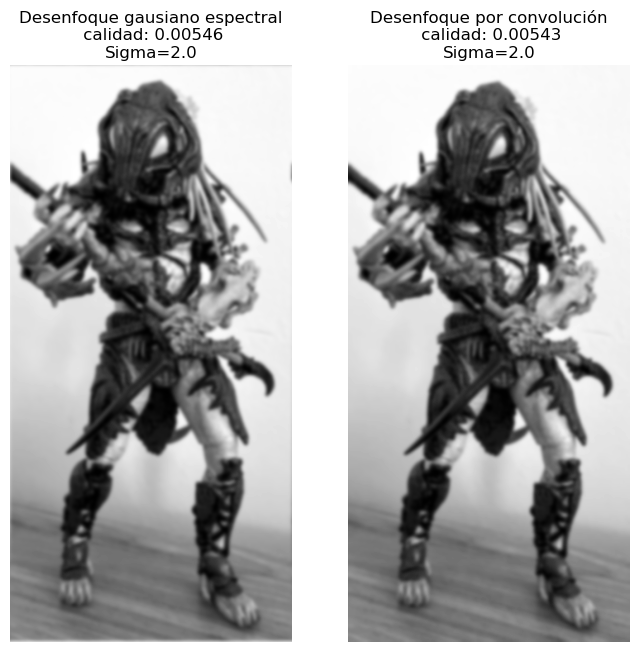

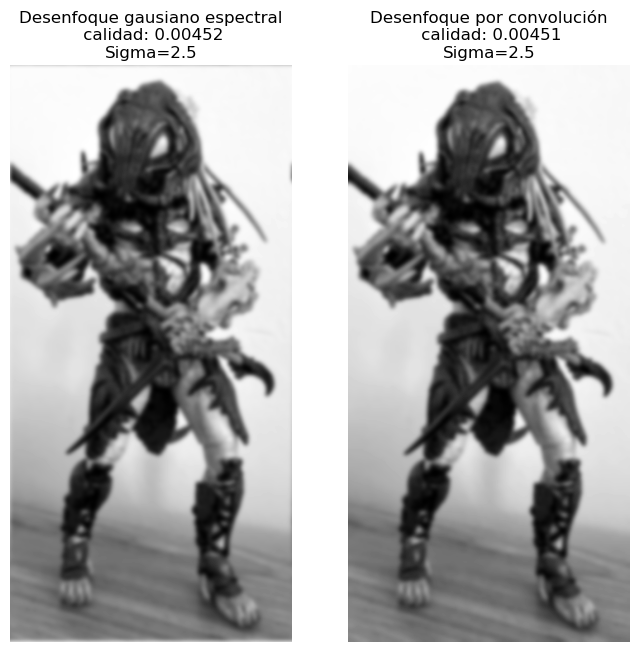

In [35]:

# Figura 'fft_alfa_pred.png'
img_name = 'fft_alfa_pred.png'

sigmas = sigmas
img = cv.imread(img_name, cv.IMREAD_GRAYSCALE)
size = 15

q_espectral_result   = []
q_convolucion_result = []

q_original = quality_measure(img)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.title('Original\n calidad: {:.5f}'.format(q_original, sigma))

for sigma in sigmas:

    img_spec_blur = gaussian_spectral_blur(img, k_size=size, sigma=sigma)
    img_conv_blur = cv.GaussianBlur(img, ksize=(size, size), sigmaX=sigma,  sigmaY=sigma)


    q_espectral =   quality_measure(img_spec_blur)
    q_convolucion = quality_measure(img_conv_blur)

    q_espectral_result.append(q_espectral)
    q_convolucion_result.append(q_convolucion)

    plt.figure(figsize=(8,8))
    plt.subplot(1,2,1)
    plt.axis('off')
    plt.imshow(img_spec_blur, cmap='gray')
    plt.title('Desenfoque gausiano espectral\n calidad: {:.5f}\nSigma={}'.format(q_espectral, sigma))

    plt.subplot(1,2,2)
    plt.axis('off')
    plt.imshow(img_conv_blur, cmap='gray')
    plt.title('Desenfoque por convolución\n calidad: {:.5f}\nSigma={}'.format(q_convolucion, sigma))

    cv.waitKey(0)

Text(0.5, 1.0, 'Calidad de la imagen vs sigma para imagen: fft_alfa_pred.png')

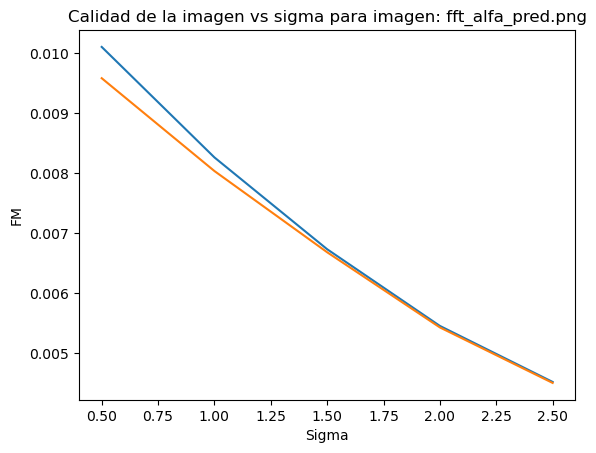

In [36]:
q_espectral_result = np.array(q_espectral_result)
q_convolucion_result = np.array(q_convolucion_result)
plt.plot(sigmas, q_espectral_result)
plt.plot(sigmas, q_convolucion_result)
plt.xlabel('Sigma')
plt.ylabel('FM')
plt.title('Calidad de la imagen vs sigma para imagen: {}'.format(img_name))

##### Imagen chewbacca.jpg

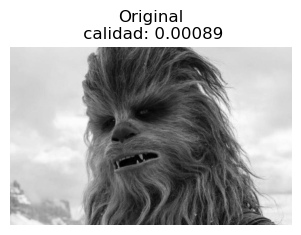

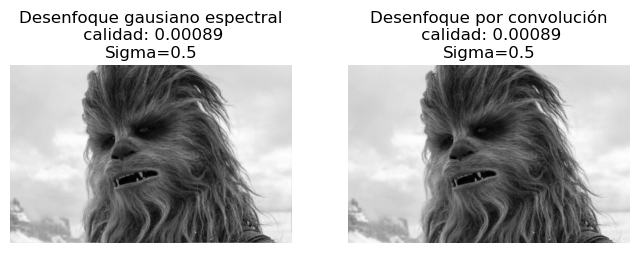

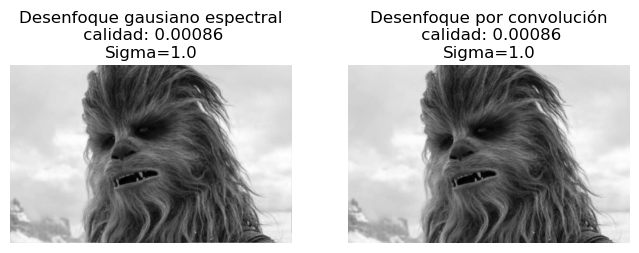

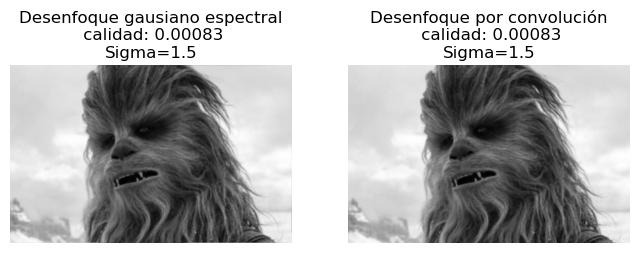

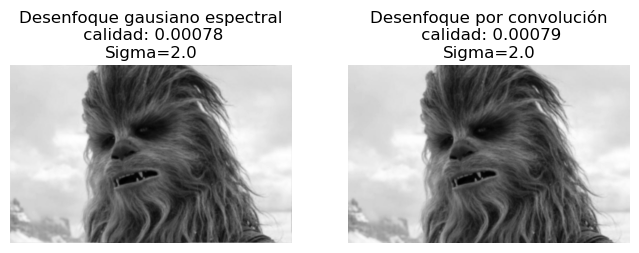

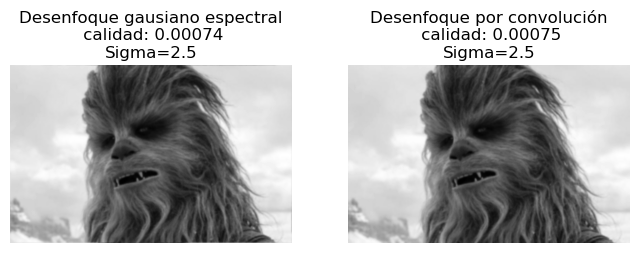

In [37]:

# Figura 'chewbacca.jpg'

img_name = 'chewbacca.jpg'

sigmas = sigmas
img = cv.imread(img_name, cv.IMREAD_GRAYSCALE)
size = 15

q_espectral_result   = []
q_convolucion_result = []

q_original = quality_measure(img)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.title('Original\n calidad: {:.5f}'.format(q_original, sigma))

for sigma in sigmas:

    img_spec_blur = gaussian_spectral_blur(img, k_size=size, sigma=sigma)
    img_conv_blur = cv.GaussianBlur(img, ksize=(size, size), sigmaX=sigma,  sigmaY=sigma)


    q_espectral =   quality_measure(img_spec_blur)
    q_convolucion = quality_measure(img_conv_blur)

    q_espectral_result.append(q_espectral)
    q_convolucion_result.append(q_convolucion)

    plt.figure(figsize=(8,8))
    plt.subplot(1,2,1)
    plt.axis('off')
    plt.imshow(img_spec_blur, cmap='gray')
    plt.title('Desenfoque gausiano espectral\n calidad: {:.5f}\nSigma={}'.format(q_espectral, sigma))

    plt.subplot(1,2,2)
    plt.axis('off')
    plt.imshow(img_conv_blur, cmap='gray')
    plt.title('Desenfoque por convolución\n calidad: {:.5f}\nSigma={}'.format(q_convolucion, sigma))

    cv.waitKey(0)

Text(0.5, 1.0, 'Calidad de la imagen vs sigma para imagen: chewbacca.jpg')

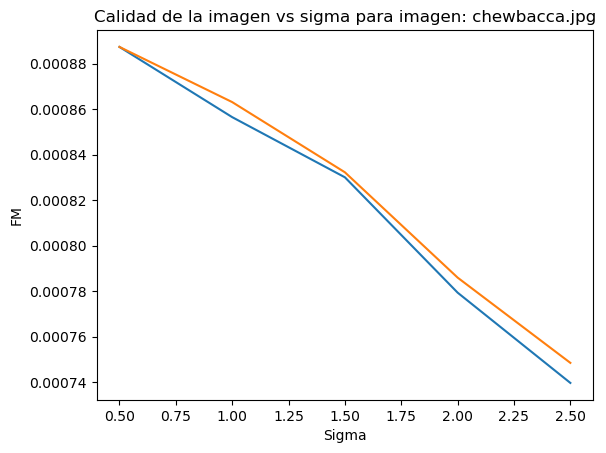

In [38]:
q_espectral_result = np.array(q_espectral_result)
q_convolucion_result = np.array(q_convolucion_result)
plt.plot(sigmas, q_espectral_result)
plt.plot(sigmas, q_convolucion_result)
plt.xlabel('Sigma')
plt.ylabel('FM')
plt.title('Calidad de la imagen vs sigma para imagen: {}'.format(img_name))

## Inciso 3

A.11. Gradient energy (GRA2) \
The sum of squares of the first derivative in the x and y directions

medida_pixel = Ix(i,j)^2 + Iy(i,j)^2 \
medida_goblal = SUM(medida_pixel) para todos los pixeles

In [57]:
img = cv.imread('mountain.jpeg',cv.IMREAD_GRAYSCALE)

# Para calcular la derivada de cada pixel voy filtrar la imagen usando el kernel de prewitt, que debería darme le mismo resultado

#prewitt
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv.filter2D(img, -1, kernelx)
img_prewitty = cv.filter2D(img, -1, kernely)

img_medida_pixel = np.power(img_prewittx, 2) + np.power(img_prewitty, 2)
print(kernelx)

print(img[-3:,-3:])
print(img_prewittx[-3:,-3:])
print(img_prewitty[-3:,-3:])

# cv.imshow("Original Image", img)
# cv.imshow("Prewitt X", img_prewittx)
# cv.imshow("Prewitt Y", img_prewitty)
# cv.imshow("Prewitt", img_prewittx + img_prewitty)

# cv.waitKey(0)
# cv.destroyAllWindows()

[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]
[[161 164 165]
 [158 163 164]
 [158 155 158]]
[[ 4  0  0]
 [ 5 19 25]
 [ 0  0  0]]
[[22 13  0]
 [ 8 10  0]
 [11 12  0]]
